# **<font color=#FF3399> Gabarito Challenge : Correlação e Regressão </font>**

Bootcamp Data Analytics & Tech Minas 2023 

WoMakersCode

-  Desafio 1: Análise de correlacao


In [ ]:
#### Importando os pacotes que serao utilizados nos dois desafios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
from scipy.stats import skewnorm ## Gerar distribuicoes assimétricas, etc (utilizado na montagem do dataset)
from google.colab import drive ## conectar com o google drive para ler seus arquivos
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **<font color=#FF3399> Desafio 1: Análise de correlação </font>**


Contexto: 

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores podem perder a venda. Como parte do time de dados, voce é responsável por analisar os principais fatores que podem afetar o preco dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

1 - Analise a correlacao de todas as variáveis com o preco do imóvel. Quais variaveis sao mais correlacionadas positivatemente? e negativamente? Quais sao menos correlacionadas? 

2 - Para as top 5 variáveis mais correlacionadas com o preco:
  1. Plote as suas distribuicoes (histograma e boxplot)
  2. Plote o scatterplot (gráfico de dispersao), contendo preco no eixo Y e a variável correlacionada no eixo X.
  3. Para cada uma das 5 variáveis faca uma regressao linear simples sendo preco a variável resposta (y) e interprete os resultados.


In [ ]:
### Antes de comecarmos a responder as perguntas vamos ler a base disponibilizada.

df = pd.read_csv("/content/drive/MyDrive/WoMakers/BOOTCAMP/Desafios/desafio_01_preco_imoveis.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500


#### Seguindo o Passo a Passo:
1. Analise a correlacao de todas as variáveis com o preco do imóvel. Quais variaveis sao mais correlacionadas positivatemente? e negativamente? Quais sao menos correlacionadas? 


In [ ]:
### Plot correlations plot
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500


In [ ]:
corr["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

As top 5 variáveis mais correlationadas com o preço sao: 
1. sqft_living, 
2. grade, 
3. sqft_above,
4. bathrooms, 
5. view. 

As menos correlacionadas sao: id, zipcode, long, condition, yr_built.

2 - Para as top 5 variáveis mais correlacionadas com o preco:
> 1. Plote as suas distribuicoes (histograma e boxplot)



Text(0.5, 1.0, 'Boxplot sqft_living')

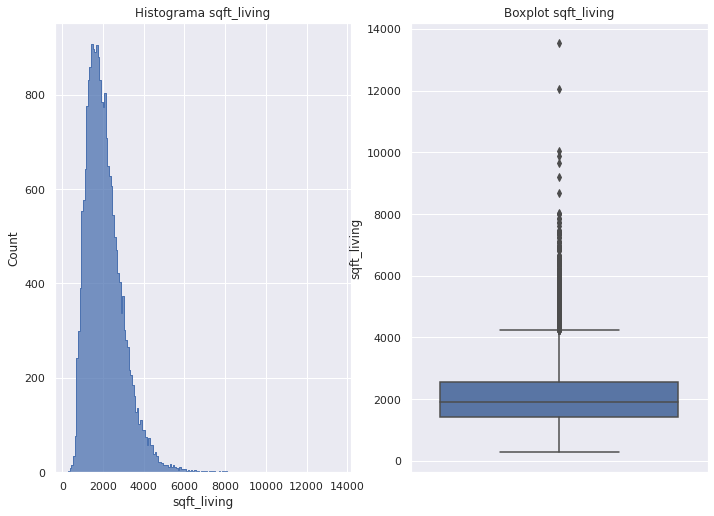

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="sqft_living", element="step", ax = ax[0]).set_title("Histograma sqft_living")
sns.boxplot( y="sqft_living", data=df, ax= ax[1]).set_title("Boxplot sqft_living")

Text(0.5, 1.0, 'Boxplot grade')

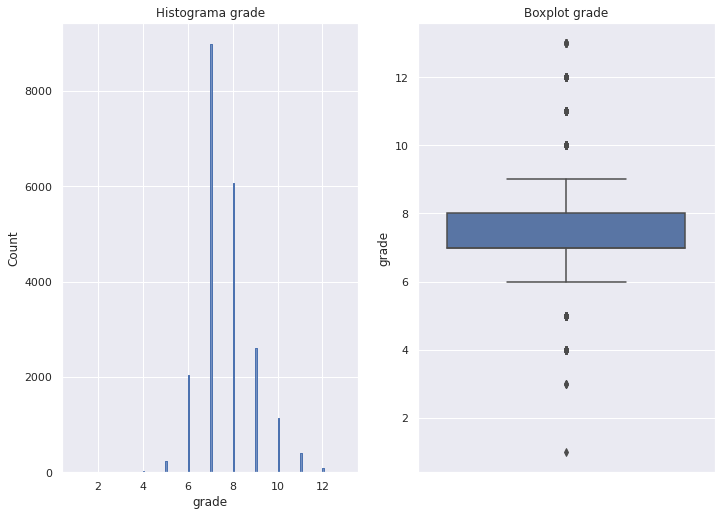

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="grade", element="step", ax = ax[0]).set_title("Histograma grade")
sns.boxplot( y="grade", data=df, ax= ax[1]).set_title("Boxplot grade")

Text(0.5, 1.0, 'Boxplot sqft_above')

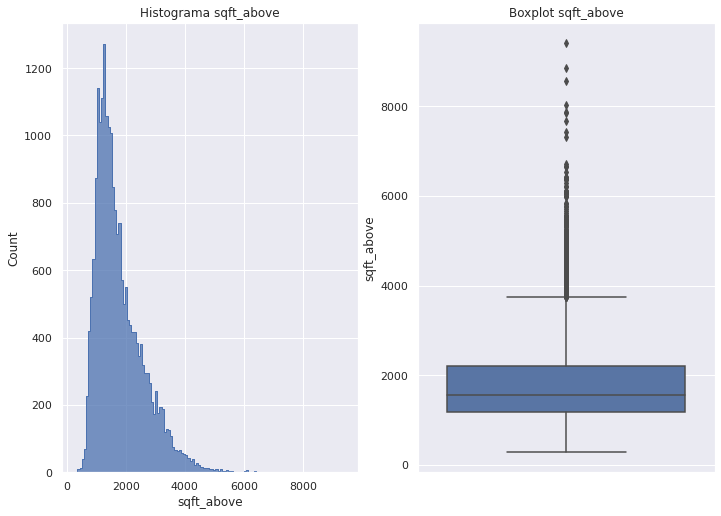

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="sqft_above", element="step", ax = ax[0]).set_title("Histograma sqft_above")
sns.boxplot( y="sqft_above", data=df, ax= ax[1]).set_title("Boxplot sqft_above")

Text(0.5, 1.0, 'Boxplot bathrooms')

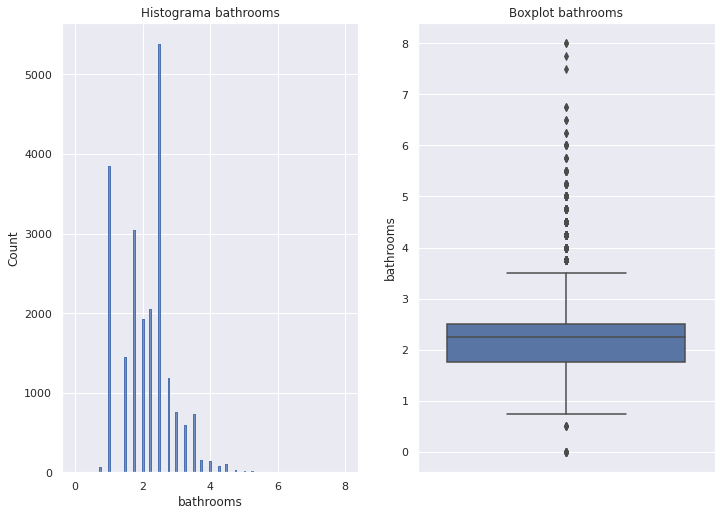

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="bathrooms", element="step", ax = ax[0]).set_title("Histograma bathrooms")
sns.boxplot( y="bathrooms", data=df, ax= ax[1]).set_title("Boxplot bathrooms")

Text(0.5, 1.0, 'Boxplot view')

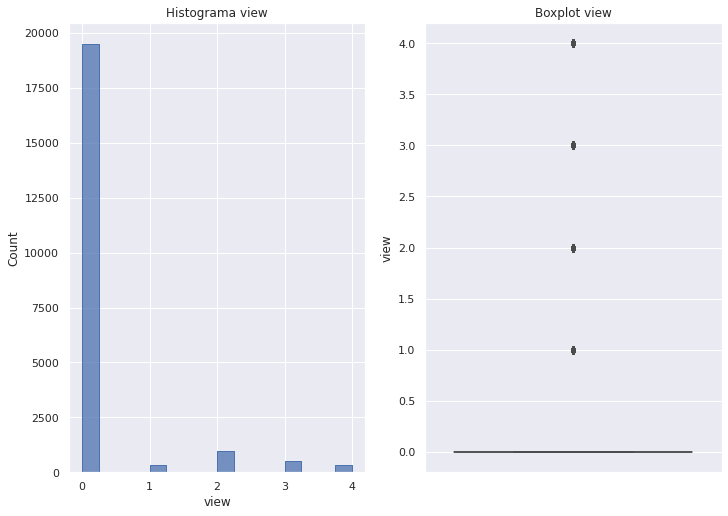

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="view", element="step", ax = ax[0]).set_title("Histograma view")
sns.boxplot( y="view", data=df, ax= ax[1]).set_title("Boxplot view")

Text(0.5, 1.0, 'Boxplot Price')

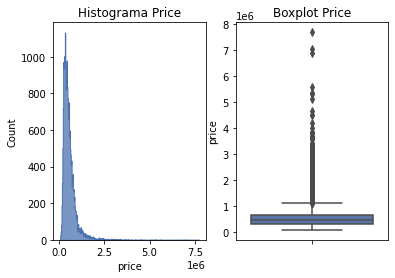

In [ ]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="price", element="step", ax = ax[0]).set_title("Histograma Price")
sns.boxplot( y="price", data=df, ax= ax[1]).set_title("Boxplot Price")


> 2. Plote o scatterplot (gráfico de dispersao), contendo preco no eixo Y e a variável correlacionada no eixo X.

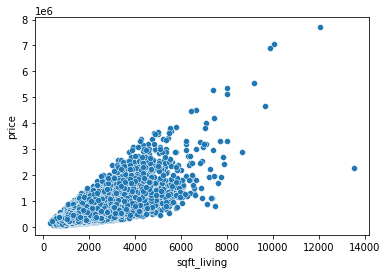

In [ ]:
sns.scatterplot(data=df, x="sqft_living", y="price")

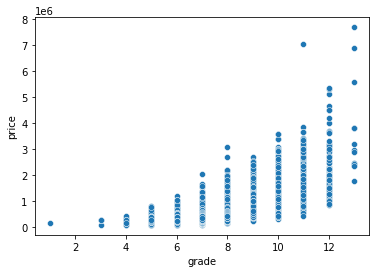

In [ ]:
sns.scatterplot(data=df, x="grade", y="price")

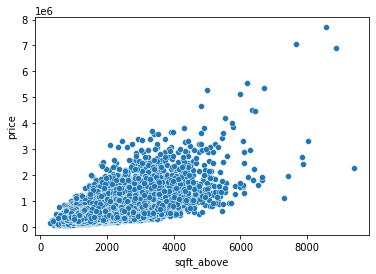

In [ ]:
sns.scatterplot(data=df, x="sqft_above", y="price")

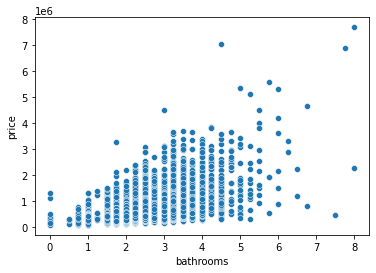

In [ ]:
sns.scatterplot(data=df, x="bathrooms", y="price")

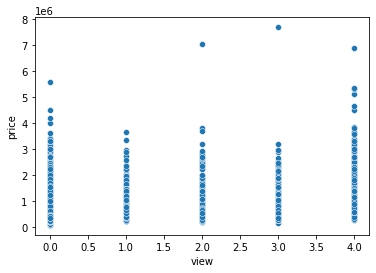

In [ ]:
sns.scatterplot(data=df, x="view", y="price")


> 3. Para cada uma das 5 variáveis faca uma regressao linear simples sendo preco a variável resposta (y) e interprete os resultados.

Limpeza de Outliers e Normalização:
- Utilizamos a normalizacao geralmente quando temos variáveis com escalas muito diferentes e/ou quando temos variáveis com distribuicao diferente de normal, e isso é um pressuposto do modelo em questao. 
- Outliers: devemos tirar quando
  1. Altera o resultado da regressão (rodar com e sem e comparar o resultado)
  2. Cria uma relação que nao existe nos dados
  3. Quando gera um viés na sua regressão

https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/#:~:text=If%20the%20outlier%20creates%20a,the%20basis%20for%20your%20results.

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = df['price']

In [ ]:
def calculate_regression(df,Y,X_name = 'bathrooms', const = True, normalize = True, logscale = False):
  if (normalize == True):
    scaler = StandardScaler() 
    df_scale = pd.DataFrame(scaler.fit_transform(df[["price",X_name]]),columns = ["price",X_name])
    Y = df_scale["price"]
    X = df_scale[X_name]
  else:
    X = df[X_name]  
  if (logscale == True):
    Y = np.log(df["price"])
    X = np.log(df[X_name])
  if (const == True):
    X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  print(results.summary())
  return results

### REGRESSÃO SIMPLES

1. Geralmente rodamos a regressao primeiramente com a constante b (y = ax + b). Porém devemos verificar via teste t, se a constante realmente impacta na variável de interesse. Caso o p-valor < 0.05, esse variável é estatisticamente significativa.

2. Normalizacao: Quando temos escalas muito diferentes podemos utilizar a normalizacao. Um outro recurso muitas vezes utilizado, é utilizar uma transformacao logaritmica para diminuir o fator da escala.


SQFT LIVING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
reg = calculate_regression(df,Y,X_name = 'sqft_living', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:32:28   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Interpretando a tabela acima:
- Constant : é estatisticamente significativa, de acordo com o teste t
- sqft living : é estatisticamente significativa. 

A cada 1 sqft em área habitável aumentamos o preço do imóvel em 280 USD.

In [ ]:
reg = calculate_regression(df,Y,X_name = 'sqft_living', const = True, normalize = True, logscale = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:40:05   Log-Likelihood:                -23330.
No. Observations:               21613   AIC:                         4.666e+04
Df Residuals:                   21611   BIC:                         4.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.17e-17      0.005  -4.48e-15      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Interpretando a tabela acima:
- Constant : nao é estatisticamente significativa, de acordo com o teste t
- sqft living : é estatisticamente significativa.

A cada 1 sqft em área habitável aumentamos o preço do imóvel em 0.7020 USD em uma escala de normalizada de 0 a 1.

Em termos de interpretabilidade, o melhor é manter a variável com o valor original ou utilizar o log (se convertermos X e Y em log a interpretacao se torna em variacao % ou elasticidade)

In [ ]:
reg = calculate_regression(df,Y,X_name = 'sqft_living', const = True, normalize = False, logscale = True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:41:59   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7299      0.047    143.001      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Interpretando a tabela acima:
- Constant :  é estatisticamente significativa, de acordo com o teste t
- sqft living : é estatisticamente significativa. 

A cada 1% a mais em sqft em área habitável aumentamos o preço do imóvel em 0.83% USD

In [ ]:
def plot_regression(X,Y, reg):
  plt.scatter(X,Y)

  #X_plot = np.linspace(0,1,100)
  plt.plot(X, X * reg.params[1] + reg.params[0])

  plt.show()

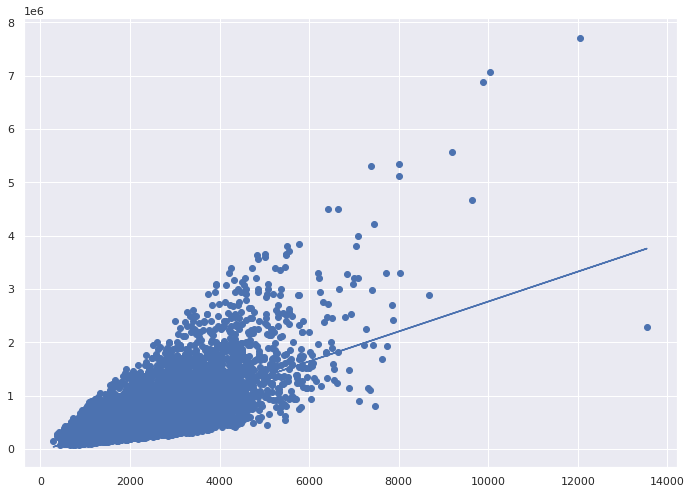

In [ ]:
plot_regression(df["sqft_living"],Y, reg)

GRADE

In [ ]:
reg = calculate_regression(df,Y,X_name = 'grade', const = True, normalize = False, logscale = True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.984e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:39:37   Log-Likelihood:                -9772.6
No. Observations:               21613   AIC:                         1.955e+04
Df Residuals:                   21611   BIC:                         1.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1425      0.035    233.137      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


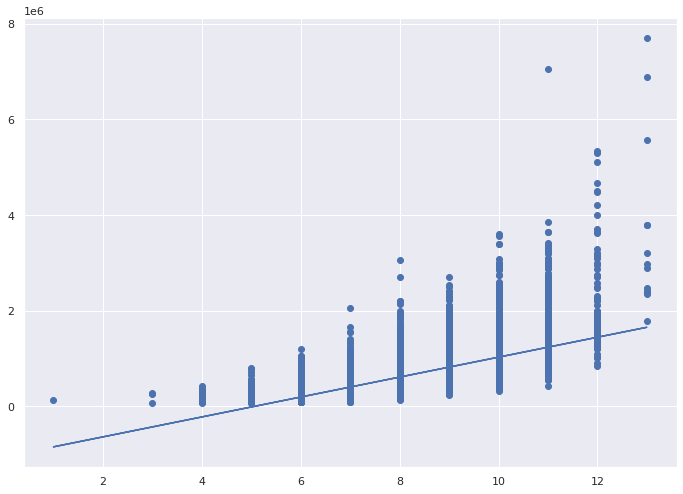

In [ ]:
plot_regression(df["grade"],Y, reg)

SQFT ABOVE

In [ ]:
reg = calculate_regression(df,Y,X_name = 'sqft_above', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:22:59   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.995e+04   4729.812     12.676      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


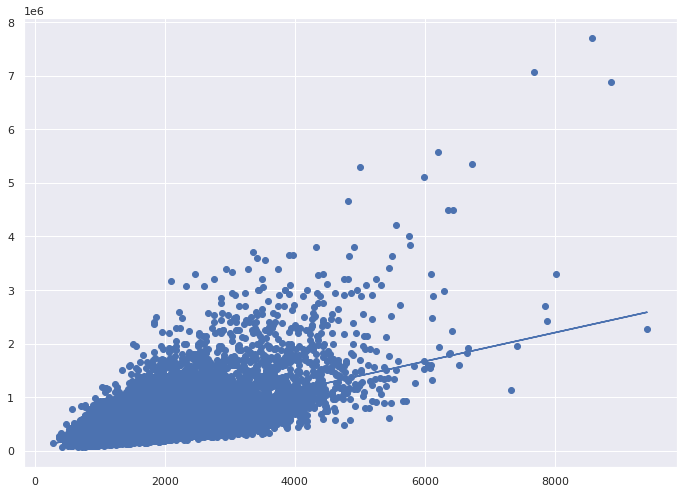

In [ ]:
plot_regression(df["sqft_above"],Y, reg)

BATHROOMS

In [ ]:
reg = calculate_regression(df,Y,X_name = 'bathrooms', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:25:26   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


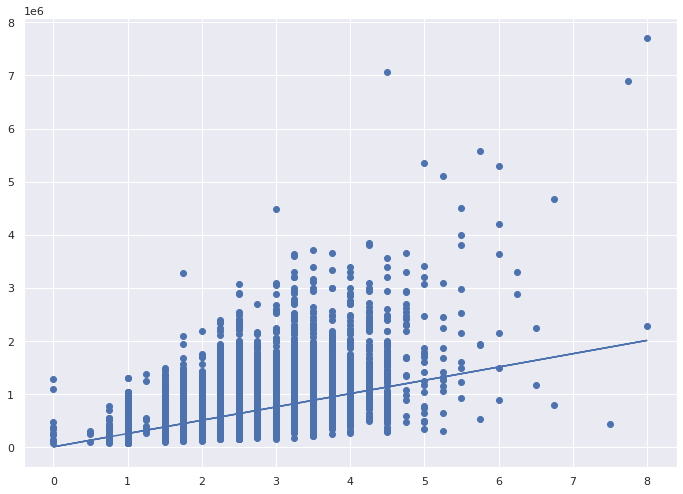

In [ ]:
plot_regression(df["bathrooms"],Y, reg)

VIEW

In [ ]:
reg = calculate_regression(df,Y,X_name = 'view', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:25:48   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+05   2396.476    206.759      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


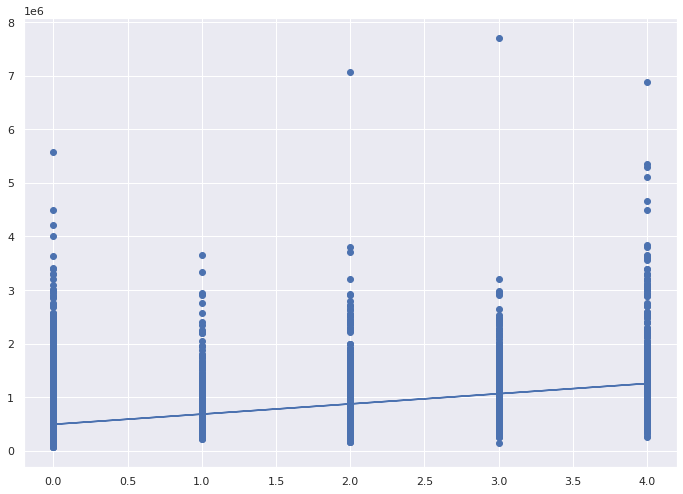

In [ ]:
plot_regression(df["view"],Y, reg)

Exemplo de função para remocao de outliers

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
new_df = remove_outlier(df,"bathrooms")

In [ ]:
reg = calculate_regression(new_df,new_df["price"],X_name = 'bathrooms', const = True, normalize = False,logscale = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     5260.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:29:08   Log-Likelihood:            -2.9321e+05
No. Observations:               21042   AIC:                         5.864e+05
Df Residuals:                   21040   BIC:                         5.864e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.075e+05   5942.762     18.082      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
reg = calculate_regression(df,df["price"],X_name = 'bathrooms', const = True, normalize = False,logscale = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:29:46   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
